# 타이타닉


### 참고 - 타이타닉 열(변수) 설명
- survived : 0 = 사망, 1 = 생존
- pclass : 1 = 1등석, 2 = 2등석, 3 = 3등석
- sex : male = 남성, female = 여성
- age : 나이
- sibsp : 타이타닉 호에 동승한 자매 / 배우자의 수
- parch : 타이타닉 호에 동승한 부모 / 자식의 수
- fare : 티켓 요금
- embarked : 탑승지, C = 셰르부르, Q = 퀸즈타운, S = 사우샘프턴
- class : First = 1등석, Second = 2등석, Third = 3등석
- who : 남/여/아이, 'man', 'woman', 'child'
- adult_male : 남자 어른, True/False
- deck : 방 위치, 'A', 'B', 'C', 'D', 'E', 'F', 'G', NaN
- embark_town : 탑승지
- alive : 생존, yes/no
- alone : 1인 탑승, True/False

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# 타이타닉 엑셀 파일 로드
df = pd.read_csv('titanic1309.csv')

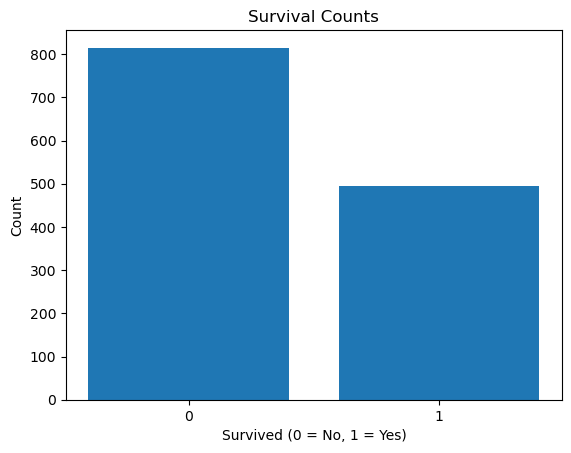

In [23]:
# 생존 여부에 따른 막대 그래프
survival_counts = df['Survived'].value_counts()
plt.bar(survival_counts.index, survival_counts.values)
plt.title('Survival Counts')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks([0, 1])  # X축 눈금 설정
plt.show()

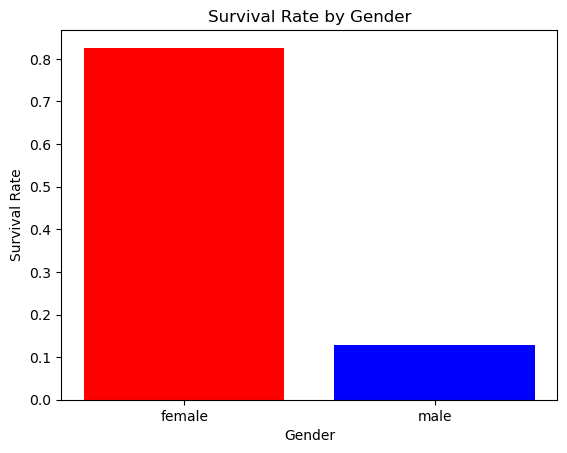

In [24]:
# 성별에 따른 생존율 막대 그래프
survival_by_gender = df.groupby('Sex')['Survived'].mean()
plt.bar(survival_by_gender.index, survival_by_gender.values, color=['red', 'blue'])
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()

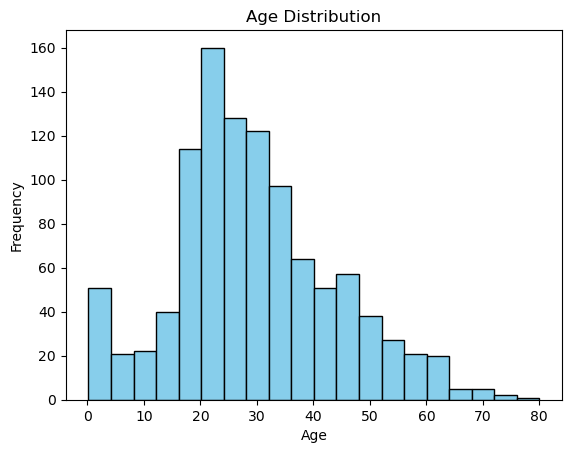

In [25]:
# 나이 분포 히스토그램
plt.hist(df['Age'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

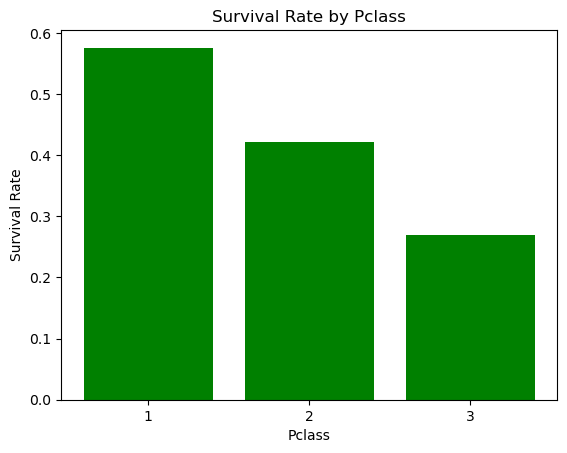

In [ ]:
# 객실 등급에 따른 생존율 막대 그래프
survival_by_pclass = df.groupby('Pclass')['Survived'].mean()
plt.bar(survival_by_pclass.index, survival_by_pclass.values, color='green')
plt.title('Survival Rate by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.xticks([1, 2, 3])  # 객실 등급 눈금 설정
plt.show()

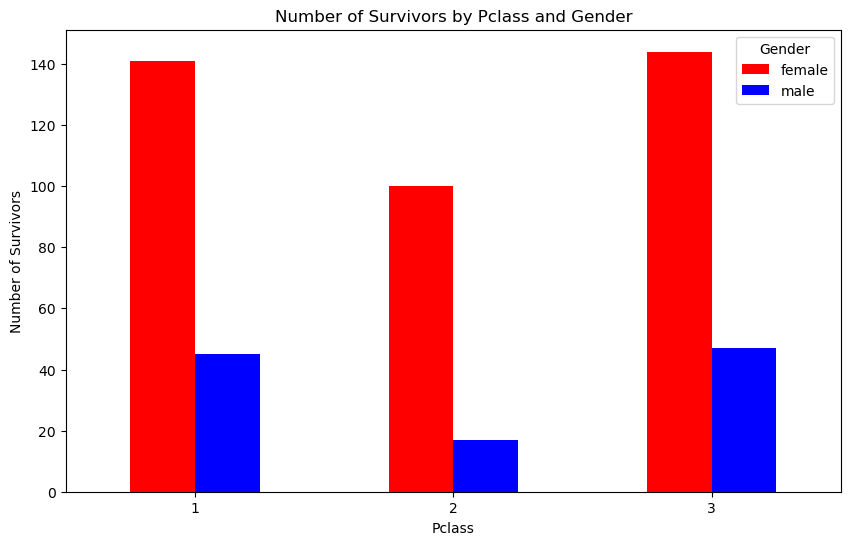

In [29]:
# 객실 등급별 남녀 생존 숫자 그룹화된 막대 그래프

# 생존자만 필터링
survived_df = df[df['Survived'] == 1]
# 객실 등급과 성별별로 생존자 수 집계
survival_by_pclass_gender = survived_df.groupby(['Pclass', 'Sex']).size().unstack()

# 그룹화된 막대 그래프 그리기
survival_by_pclass_gender.plot(kind='bar', figsize=(10, 6), color=['red', 'blue'])
plt.title('Number of Survivors by Pclass and Gender')
plt.xlabel('Pclass')
plt.ylabel('Number of Survivors')
plt.xticks(rotation=0)  # X축 레이블 회전 없음
plt.legend(title='Gender')
plt.show()

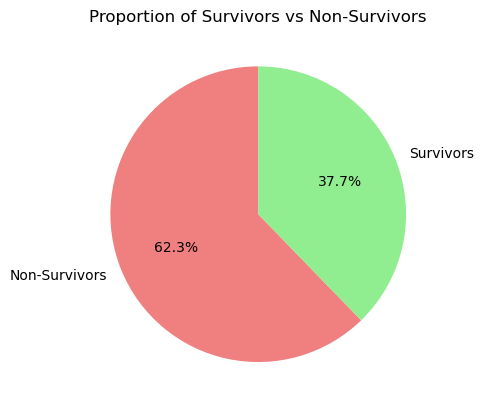

In [31]:
# 생존자 vs 비생존자 비율 원형 차트
survival_proportions = df['Survived'].value_counts()
plt.pie(survival_proportions, labels=['Non-Survivors', 'Survivors'], autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'], startangle=90)
plt.title('Proportion of Survivors vs Non-Survivors')
plt.show()

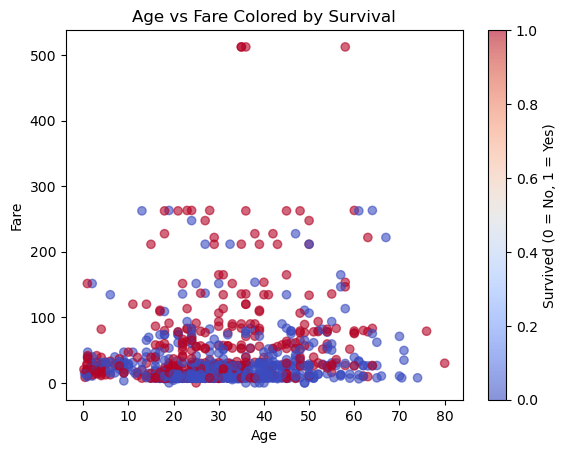

In [32]:
# 나이 vs 요금 산점도 (생존 여부로 색상 구분)
plt.scatter(df['Age'], df['Fare'], c=df['Survived'], cmap='coolwarm', alpha=0.6)
plt.title('Age vs Fare Colored by Survival')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.colorbar(label='Survived (0 = No, 1 = Yes)')
plt.show()